In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, 1].values
X = dataset.iloc[:, :-1]
#
y = dataset.iloc[:, 1]



In [3]:
print(dataset.shape)


(30, 2)


In [4]:
print(dataset.dtypes)

YearsExperience    float64
Salary             float64
dtype: object


In [5]:
# Missing values
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
# head
print(dataset.head(20))


    YearsExperience   Salary
0               1.1  39343.0
1               1.3  46205.0
2               1.5  37731.0
3               2.0  43525.0
4               2.2  39891.0
5               2.9  56642.0
6               3.0  60150.0
7               3.2  54445.0
8               3.2  64445.0
9               3.7  57189.0
10              3.9  63218.0
11              4.0  55794.0
12              4.0  56957.0
13              4.1  57081.0
14              4.5  61111.0
15              4.9  67938.0
16              5.1  66029.0
17              5.3  83088.0
18              5.9  81363.0
19              6.0  93940.0


In [6]:
print(dataset.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


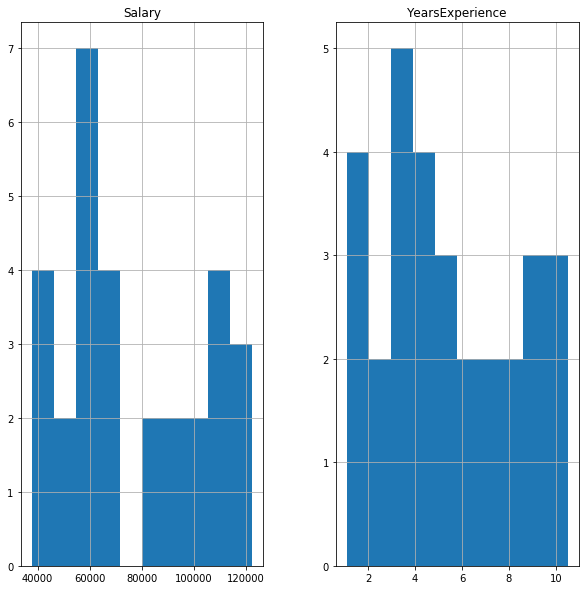

In [7]:
# histograms
dataset.hist(figsize=(10,10))
plt.show()


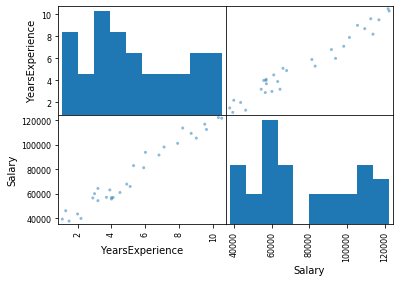

In [8]:
from pandas.plotting import scatter_matrix

scatter_matrix(dataset)
plt.show()

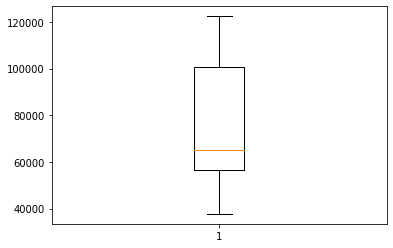

In [9]:
# Box plot
plt.boxplot(dataset['Salary'])
plt.show()


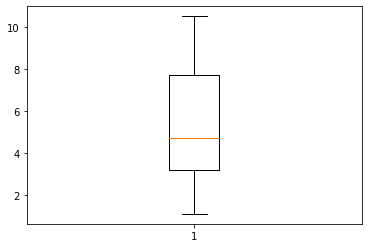

In [10]:
# Box plot
plt.boxplot(dataset['YearsExperience'])
plt.show()

In [12]:
 #Outliers handleing
# Here we will  cap the outlier for above 95th percentile to 95th percentile and  below 5th percentile to 5th percentile

#dataset.loc[dataset['CreditScore']>dataset['CreditScore'].quantile(0.95),['CreditScore']]=dataset['CreditScore'].quantile(0.95)

#dataset.loc[dataset['salary']>dataset['salary'].quantile(0.95),['salary']]=dataset['salary'].quantile(0.95)

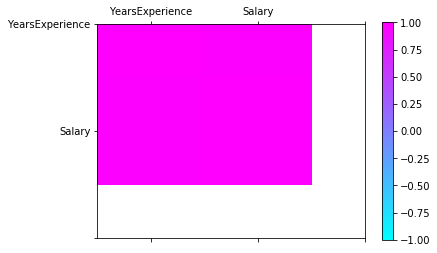

In [11]:
# correlation matrix
cols=['YearsExperience','Salary']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(),cmap='cool', vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,3,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(cols)
ax.set_yticklabels(cols)
plt.show()

In [12]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


In [16]:
# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [14]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

26816.19224403119
[9345.94244312]


In [15]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
YearsExperience,9345.942443


In [16]:
regressor.coef_
from sklearn.metrics import r2_score

r2 = r2_score(y_train,regressor.predict(X_train))
print(r2)

0.9381900012894278


0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64
0.9749154407708353


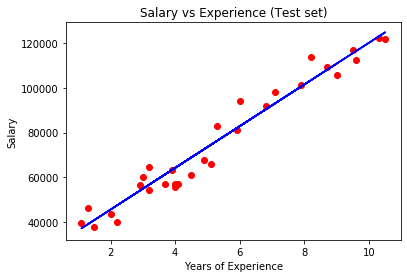

In [17]:
# Predicting the Test set results
pred=regressor.predict(X_test)
print(y)

r2 = r2_score(y_test,regressor.predict(X_test))
print(r2)

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

C:\Users\Sm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


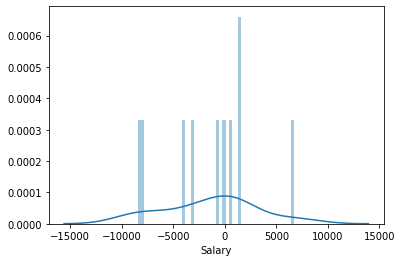

In [22]:
import seaborn as sns

sns.distplot((y_test-pred),bins=50);